# Business Case: 
FicZon Inc is an IT solution provider with products ranging from on premises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website. FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation. 
FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness. 

**Project Goal:** 
1. Data exploration insights – Sales effectiveness 
2. ML model to predict the Lead Category (High Potential, Low Potential)

# Importing the libraries

In [1]:
!pip install pymysql
!pip install mysql-connector

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

import mysql.connector

# Loading the data

In [3]:
connection = mysql.connector.connect(host = '18.136.157.135', user='dm_team2', password='DM!$Team&27@9!20!',
                                     database='project_sales')

In [4]:
cursor = connection.cursor()
cursor.execute('show databases')

for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [5]:
database_tables = pd.read_sql_query('show tables',connection)

database_tables

,Tables_in_project_sales
0,data


In [6]:
query = "select * from data"

In [7]:
sales_df = pd.read_sql(query, connection)

In [8]:
print(sales_df.shape)

sales_df.head()

(7422, 9)


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [9]:
sales_df.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [11]:
sales_df.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [12]:
sales_df.nunique()

Created          6752
Product_ID         30
Source             26
Mobile            487
EMAIL             883
Sales_Agent        13
Location           18
Delivery_Mode       5
Status             11
dtype: int64

In [13]:
sales_df.describe(include='object')

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


# Data Preprocessing and Feature Engineering

In [14]:
# Drop unnecessary columns
sales_df.drop(['Created', 'Mobile', 'EMAIL'], axis=1, inplace=True)

In [15]:
sales_df.replace('',pd.NA,inplace=True)

In [16]:
sales_df.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [17]:
columns_to_fill = ['Product_ID', 'Source', 'Sales_Agent', 'Location']

for column in columns_to_fill:
    sales_df[column].fillna(sales_df[column].mode()[0], inplace=True)

In [18]:
sales_df.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

#### Defining the Source

In [19]:
sales_df['Source'].unique()

array(['Website', 'Call', 'Live Chat-Google Organic', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [20]:
sales_df['Source'].replace(['Live Chat-Google Organic', 'Live Chat-Direct', 'Live Chat-Blog', 'Live Chat -PPC',
                            'Live Chat-Google Ads', 'Live Chat-Adwords Remarketing', 'Live Chat-Quora', 'Live Chat-Youtube',
                            'Live Chat-Justdial','Live Chat-CPC'], 'Live Chat',inplace=True)

sales_df['Source'].replace(['Existing Client', 'CRM form', 'Personal Contact'], 'Existing Customer', inplace=True)

sales_df['Source'].replace(['By Recommendation', 'Customer Referral'], 'Customer Referral', inplace=True)

sales_df['Source'].replace(['US Website', 'Just Dial'], 'Website', inplace=True)

sales_df['Source'].replace(['E-mail Campaign', 'SMS Campaign', 'E-Mail Message', 'Other'], 'Campaign', inplace=True)

In [21]:
sales_df['Source'].unique()

array(['Website', 'Call', 'Live Chat', 'Customer Referral', 'Campaign',
       'Existing Customer'], dtype=object)

#### Defining the Location

In [22]:
sales_df['Location'].unique()

array(['Other Locations', 'Bangalore', 'UAE', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata', 'Singapore',
       'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'], dtype=object)

In [23]:
sales_df['Location'].replace(['UK', 'USA', 'UAE', 'Singapore', 'AUSTRALIA', 'EUROPE', 'Malaysia'], 'Foreign', inplace=True)

sales_df['Location'].replace(['Bangalore', 'Trivandrum', 'Hyderabad', 'Chennai', 'Delhi', 'Mumbai', 'Kolkata', 'Pune',
                              'Howrah'],'India', inplace=True)

In [24]:
sales_df['Location'].unique()

array(['Other Locations', 'India', 'Foreign'], dtype=object)

#### Defining the Status as 'High' or 'Low'

In [25]:
sales_df['Status'].unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [26]:
# High potential-> 1 and Low potential-> 0
sales_df['Status'].replace(['Potential', 'In Progress Positive', 'CONVERTED', 'Open',  'Long Term', 'converted'],
                           '1',inplace=True)

sales_df['Status'].replace(['Not Responding', 'Just Enquiry','In Progress Negative', 'LOST', 'Junk Lead'], 
                           '0',inplace=True)

In [27]:
sales_df['Status'].unique()

array(['1', '0'], dtype=object)

In [28]:
sales_df['Product_ID'] = sales_df['Product_ID'].astype(int)

sales_df['Status'] = sales_df['Status'].astype(int)

In [29]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7422 non-null   int32 
 1   Source         7422 non-null   object
 2   Sales_Agent    7422 non-null   object
 3   Location       7422 non-null   object
 4   Delivery_Mode  7422 non-null   object
 5   Status         7422 non-null   int32 
dtypes: int32(2), object(4)
memory usage: 290.1+ KB


In [30]:
sales_df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,1
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,1
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,1
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,1
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,1
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,India,Mode-4,0
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,0
7419,5,Live Chat,Sales-Agent-11,India,Mode-1,0
7420,21,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,0


# Exploratory Data Analysis

> ### Univariate Analysis

In [31]:
numerical_df = sales_df.select_dtypes(include=['int32', 'float32'])

numerical_df.columns

Index(['Product_ID', 'Status'], dtype='object')

In [32]:
categorical_df = sales_df.select_dtypes(include=['object'])

categorical_df.columns

Index(['Source', 'Sales_Agent', 'Location', 'Delivery_Mode'], dtype='object')

In [33]:
def categorical_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [34]:
categorical_univariate_analysis(categorical_df)

********** Source **********
count                                                   7422
nunique                                                    6
unique     [Website, Call, Live Chat, Customer Referral, ...
Name: Source, dtype: object
Value Counts: 
 Source
Live Chat            2677
Call                 2564
Website              1787
Customer Referral     212
Existing Customer     146
Campaign               36
Name: count, dtype: int64

********** Sales_Agent **********
count                                                   7422
nunique                                                   12
unique     [Sales-Agent-11, Sales-Agent-10, Sales-Agent-3...
Name: Sales_Agent, dtype: object
Value Counts: 
 Sales_Agent
Sales-Agent-4     1523
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4


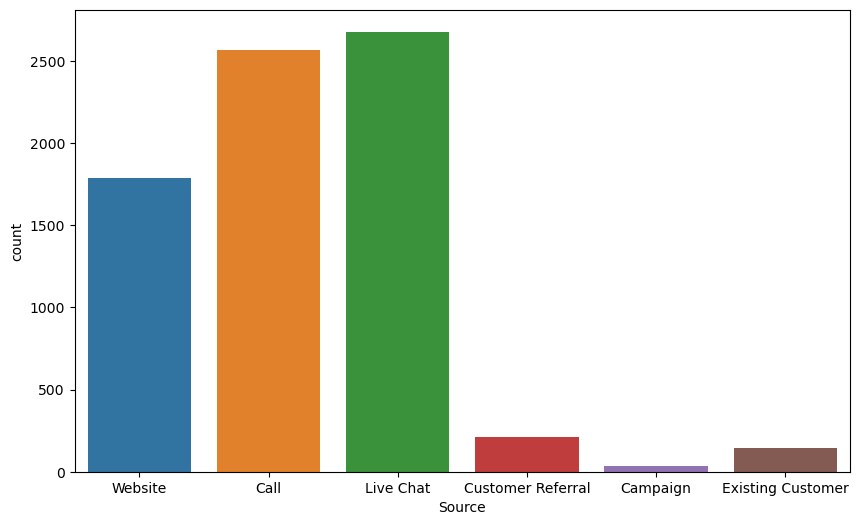

In [35]:
# Distribution of Source
plt.figure(figsize=(10, 6))
sns.countplot(x='Source', data=categorical_df)
plt.show()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

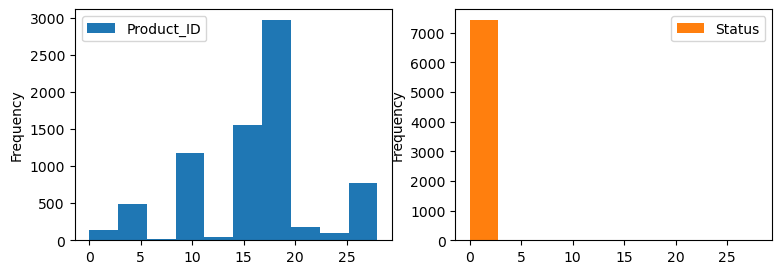

In [36]:
numerical_df.plot(kind='hist', subplots=True, layout=(1, 2), figsize=(9, 3))

> ### Bivariate Analysis

In [37]:
numerical_df.columns

Index(['Product_ID', 'Status'], dtype='object')

In [38]:
categorical_df.columns

Index(['Source', 'Sales_Agent', 'Location', 'Delivery_Mode'], dtype='object')

In [39]:
pd.crosstab(categorical_df['Delivery_Mode'], categorical_df['Location'])

Location,Foreign,India,Other Locations
Delivery_Mode,,,
Mode-1,14,2225,388
Mode-2,2,4,5
Mode-3,117,1024,547
Mode-4,11,89,21
Mode-5,70,1308,1597


<Axes: xlabel='Delivery_Mode'>

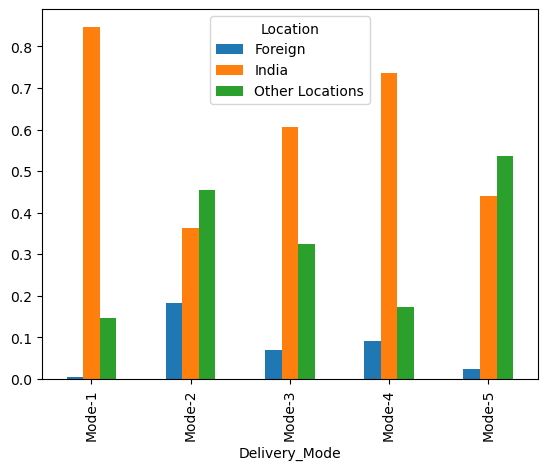

In [40]:
tab = pd.crosstab(categorical_df['Delivery_Mode'], categorical_df['Location'], normalize='index')

tab.plot(kind='bar')

<Axes: ylabel='Delivery_Mode'>

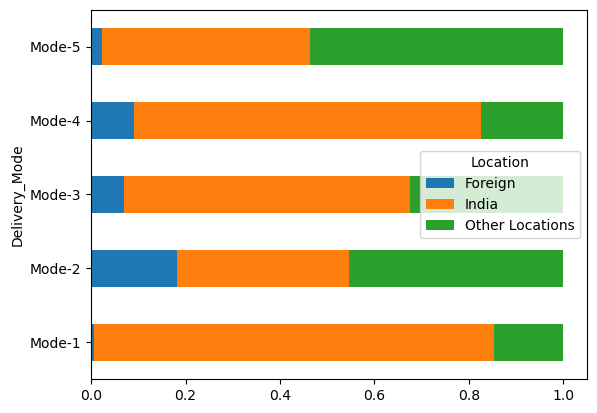

In [41]:
tab.plot(kind='barh', stacked=True)

In [42]:
group = sales_df.groupby('Location')

group['Product_ID'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Location,,,,
Foreign,2,27,16.434579,18.0
India,0,28,16.154839,18.0
Other Locations,1,27,15.575841,15.0


In [43]:
from sklearn.preprocessing import LabelEncoder

categorical = sales_df.describe(include='O')

label = LabelEncoder()

for feature in categorical.columns:
    sales_df[feature]=label.fit_transform(sales_df[feature])

In [44]:
sales_df

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,5,2,2,4,1
1,18,5,1,2,4,1
2,18,5,1,2,4,1
3,18,5,1,2,4,1
4,18,5,1,2,4,1
...,...,...,...,...,...,...
7417,9,0,8,1,3,0
7418,15,0,3,2,4,0
7419,5,4,2,1,0,0
7420,21,3,6,2,0,0


In [45]:
sales_df.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.064199,0.002746,-0.046474,-0.033046,0.086057
Source,0.064199,1.000000,-0.030093,-0.105285,-0.209298,-0.010845
Sales_Agent,0.002746,-0.030093,1.000000,-0.082935,-0.233541,0.119996
Location,-0.046474,-0.105285,-0.082935,1.000000,0.304773,-0.276921
Delivery_Mode,-0.033046,-0.209298,-0.233541,0.304773,1.000000,-0.208119
Status,0.086057,-0.010845,0.119996,-0.276921,-0.208119,1.000000


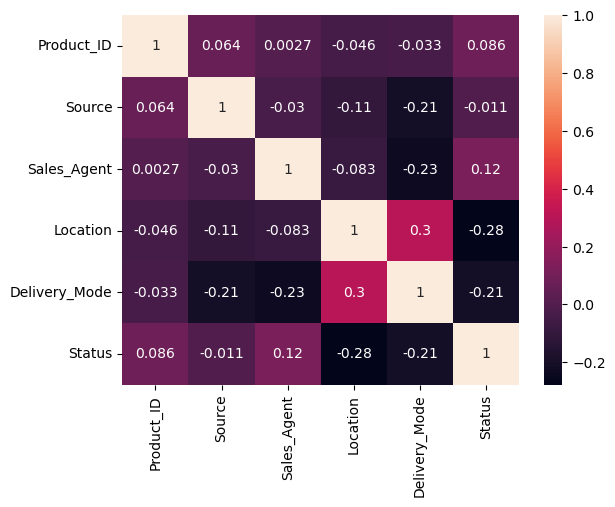

In [46]:
sns.heatmap(sales_df.corr(),annot=True)
plt.show()

# ML Model Building

## Identifying Inputs and Output

In [47]:
# Split the data into training and testing sets
X = sales_df.drop('Status', axis=1)

y = sales_df['Status']

## Split data into train and test sets

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5937, 5) (5937,)
(1485, 5) (1485,)


## Data preprocessing on X_train and X_test

In [49]:
y_train.value_counts()

Status
0    3601
1    2336
Name: count, dtype: int64

In [50]:
# Balancing the dataset by using SMOTE oversampling technique
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)

In [51]:
y_train.value_counts()

Status
1    3601
0    3601
Name: count, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Train and Evaluate the model

> ### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr_model = LogisticRegression()

lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

# Evaluate the model
print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6484848484848484
F1_Score: 0.612759643916914


> ### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.694949494949495
F1_Score: 0.6098191214470284


> ### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf_model = RandomForestClassifier()

rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6909090909090909
F1_Score: 0.6152556580050295


> ### SVM

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

svm_model = SVC()

svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6727272727272727
F1_Score: 0.6306990881458967


> ### Bagging

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

bag_model = BaggingClassifier()

bag_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = bag_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6909090909090909
F1_Score: 0.6234618539786709


> ### Gradient Boost

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

gb_model = GradientBoostingClassifier()

gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.703030303030303
F1_Score: 0.6631016042780749


> ### Ada Boost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score

ab_model = AdaBoostClassifier()

ab_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ab_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6760942760942761
F1_Score: 0.638617580766341


> ### XGBoost

In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1_Score:", f1_score)

Accuracy: 0.6996632996632997
F1_Score: 0.6356209150326797


## HyperParameter Tuning

In [61]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import GridSearchCV

In [62]:
import joblib
from joblib import Memory

import os
import warnings

warnings.filterwarnings('ignore')

In [63]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ], memory=memory),
    'bagging': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', BaggingClassifier())
    ], memory=memory),
    'gradient_boost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier())
    ], memory=memory),
    'ada_boost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', AdaBoostClassifier())
    ], memory=memory),
    'xg_boost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier())
    ], memory=memory)
}

In [64]:
# Define parameter grid for each algorithm
param_grids = {
    'logistic_regression': [
        {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.2, 0.4, 0.5, 0.6, 0.8],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced', None]
        }
    ],
    'decision_tree': [
        {
            'classifier__max_depth': [None, 3, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10]
        }
    ],
    'random_forest': [
        {
            'classifier__n_estimators': [50, 100, 200, 500],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10]
        }
    ],
    'bagging': [
        {
            'classifier__base_estimator': [DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=10)],
            'classifier__n_estimators': [10, 50, 100, 200]
        }
    ],
    'gradient_boost': [
        {
            'classifier__n_estimators': [50, 100, 200, 500],
            'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]        }
    ],
    'ada_boost': [
        {
            'classifier__base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
            'classifier__n_estimators': [50, 100, 200, 500],
            'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]
        }
    ],
    'xg_boost': [
        {
            'classifier__n_estimators': [50, 100, 200, 500],
            'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]        }
    ]
}

In [65]:
# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*15, algo, "*"*15)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1
                              )

    # Ensure to have a split dataset
    %time grid_search.fit(X_train_scaled, y_train)

    best_models[algo] = grid_search.best_estimator_
    
    print('Test Score: ', grid_search.score(X_test_scaled, y_test))
    print()

*************** logistic_regression ***************
Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 45.5 s
Wall time: 17.9 s
Test Score:  0.6484848484848484

*************** decision_tree ***************
Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: total: 1.12 s
Wall time: 2.24 s
Test Score:  0.6956228956228956

*************** random_forest ***************
Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: total: 9min 2s
Wall time: 10min 33s
Test Score:  0.7023569023569024

*************** bagging ***************
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 42.9 s
Wall time: 47.4 s
Test Score:  0.7037037037037037

*************** gradient_boost ***************
Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 2min 13s
Wall time: 2min 30s
Test Score:  0.7111111111111111

*************** ada_boost ***************
Fitting 5 folds for each of 40 c

In [66]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=10, l1_ratio=0.2, penalty='elasticnet',
                                    solver='saga'))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(min_samples_split=5))])

random_forest
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_split=10))])

bagging
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('classifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                                   n_estimators=200))])

gradient_boost
Pipeline(memory=Memory(

In [68]:
for name, model in best_models.items():
    print("*" * 15, name, "*" * 15)

    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')

    %time y_test_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_test_pred)
    
    print("Test Score: ", acc)

    print("Model Size: ", os.path.getsize(f'{name}.pkl'), "Bytes")

*************** logistic_regression ***************
CPU times: total: 0 ns
Wall time: 768 µs
Test Score:  0.6484848484848484
Model Size:  1726 Bytes
*************** decision_tree ***************
CPU times: total: 0 ns
Wall time: 0 ns
Test Score:  0.6956228956228956
Model Size:  129008 Bytes
*************** random_forest ***************
CPU times: total: 62.5 ms
Wall time: 77.1 ms
Test Score:  0.7023569023569024
Model Size:  8017384 Bytes
*************** bagging ***************
CPU times: total: 109 ms
Wall time: 152 ms
Test Score:  0.7037037037037037
Model Size:  9807791 Bytes
*************** gradient_boost ***************
CPU times: total: 15.6 ms
Wall time: 34.8 ms
Test Score:  0.7111111111111111
Model Size:  853220 Bytes
*************** ada_boost ***************
CPU times: total: 250 ms
Wall time: 319 ms
Test Score:  0.6942760942760943
Model Size:  449494 Bytes
*************** xg_boost ***************
CPU times: total: 31.2 ms
Wall time: 8.75 ms
Test Score:  0.7057239057239058
Model

# Predicting results on new datapoint using XG Boost Classifier

In [71]:
from joblib import load

# Load the model
model = load('xg_boost.pkl')

# Define the datapoint
datapoint = [18, 5, 2, 2, 4]

# Reshape the datapoint to 2D array
datapoint_reshaped = [datapoint]

# Predict the status
prediction = model.predict(datapoint_reshaped)

if(prediction[0]==1):
    print("Status: High Potential")
else:
    print("Status: Low Potential")

Status: High Potential
